# **Traffic Sign Classification**

In [1]:
import os
import random
import pathlib
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
import seaborn as sns

from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping

In [5]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [6]:
base_dir = '{path}/Train'

In [7]:
print(os.listdir(base_dir))

['37', '28', '33', '15', '30', '11', '25', '34', '40', '17', '3', '22', '19', '14', '32', '24', '29', '6', '16', '23', '9', '4', '12', '13', '5', '0', '10', '31', '26', '18', '1', '7', '21', '2', '35', '20', '42', '8', '41', '38', '36', '27', '39']


In [8]:
print(len(os.listdir(base_dir)))

43


In [9]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

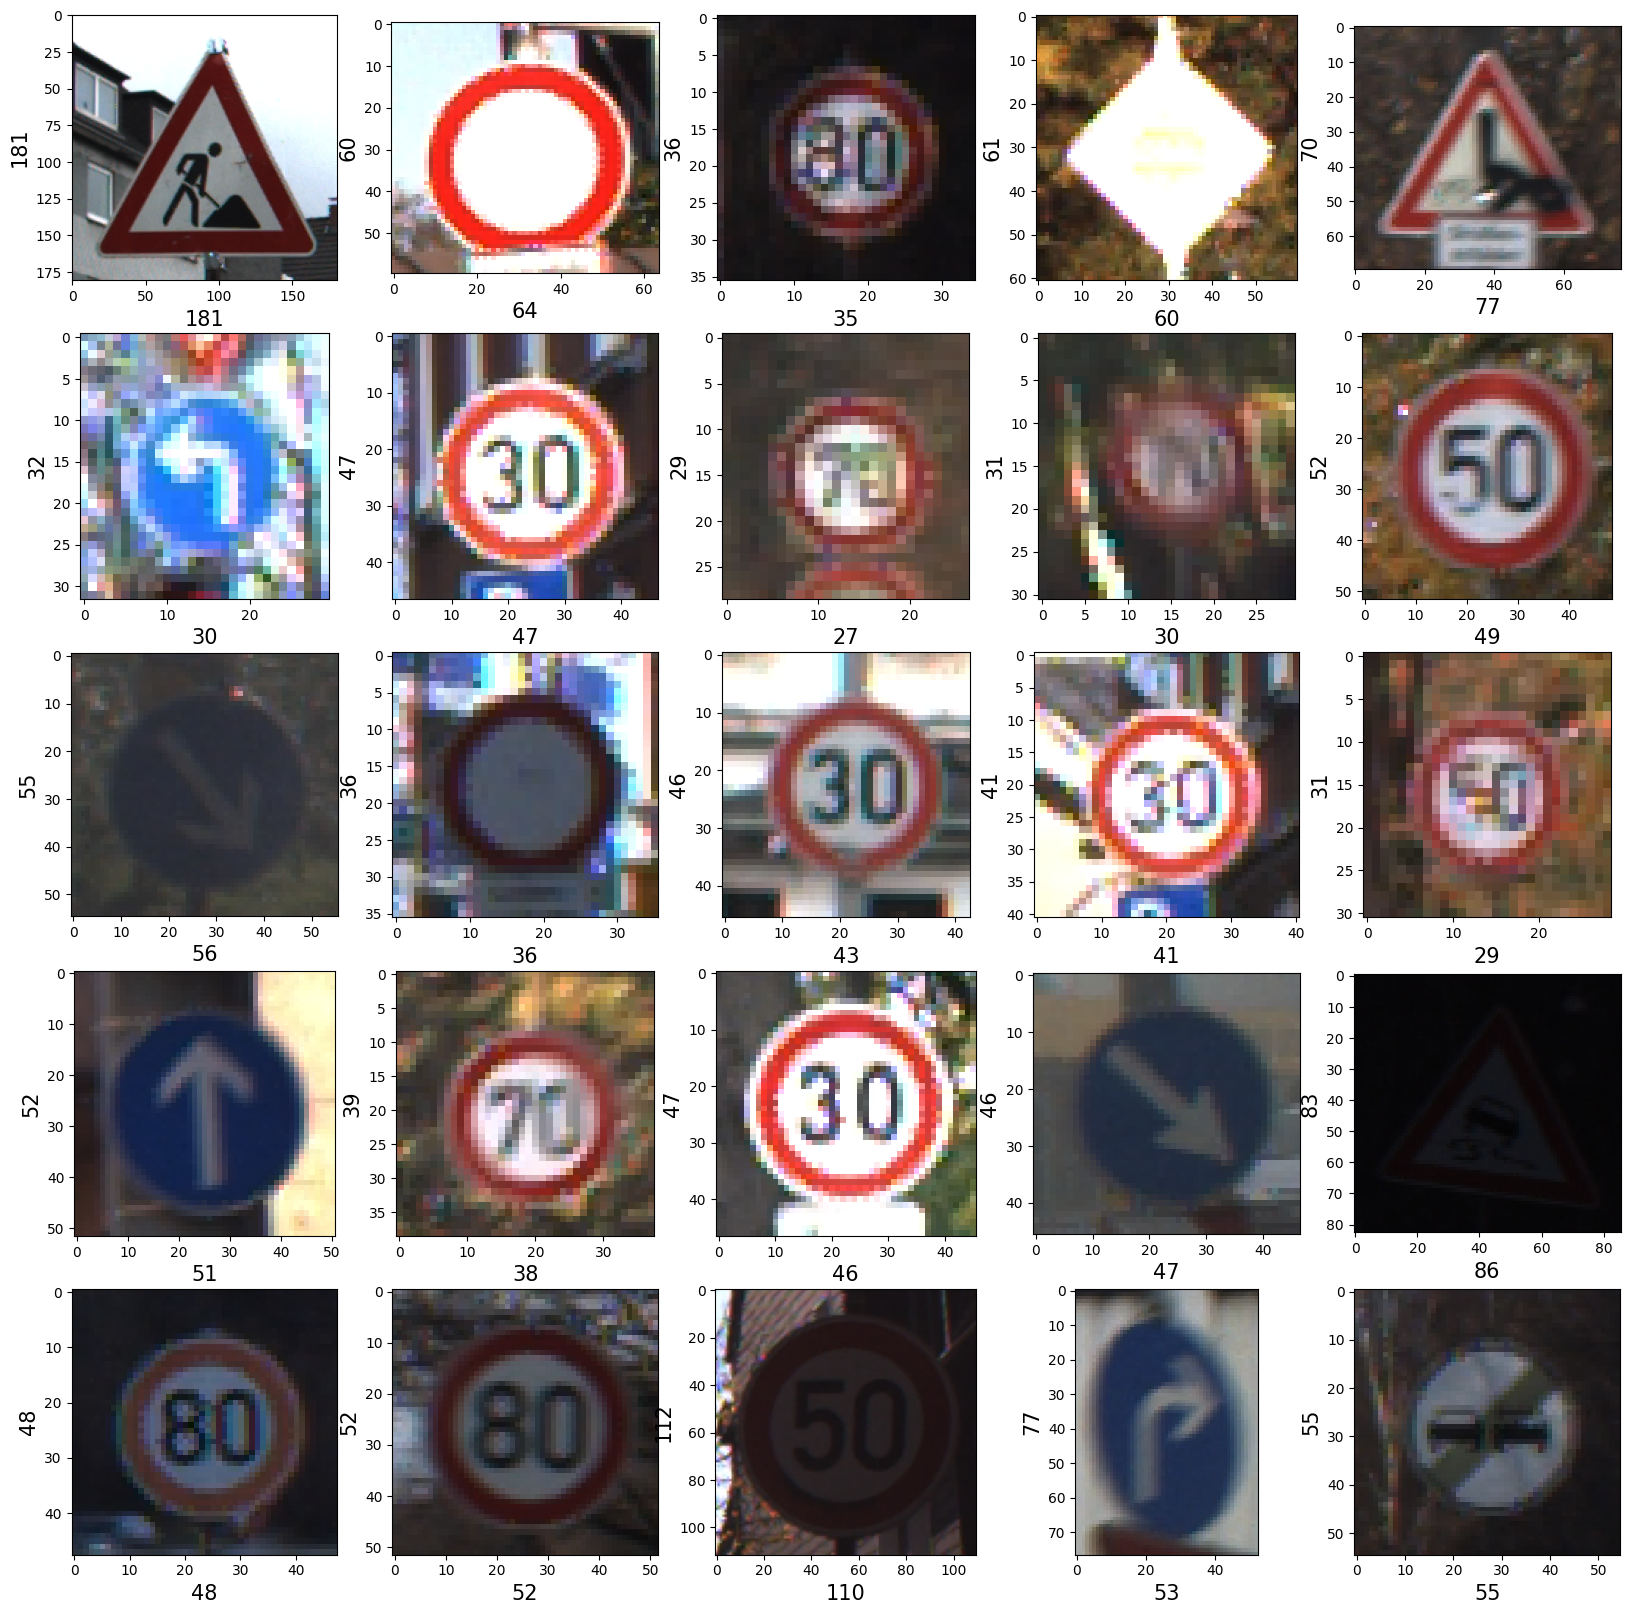

In [15]:
df = pd.read_csv('Test.csv')
imgs = df["Path"].values

plt.figure(figsize=(20,20))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = "/" + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 15)
    plt.ylabel(rand_img.shape[0], fontsize = 15)

In [17]:
batch_size = 150
seed = 42

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    vertical_flip=False,
    horizontal_flip=False,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(50, 50),
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    color_mode='rgb',
    interpolation='hamming',
    class_mode='categorical',
    subset='training'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(50, 50),
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    color_mode='rgb',
    interpolation='hamming',
    class_mode='categorical',
    subset='validation'
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


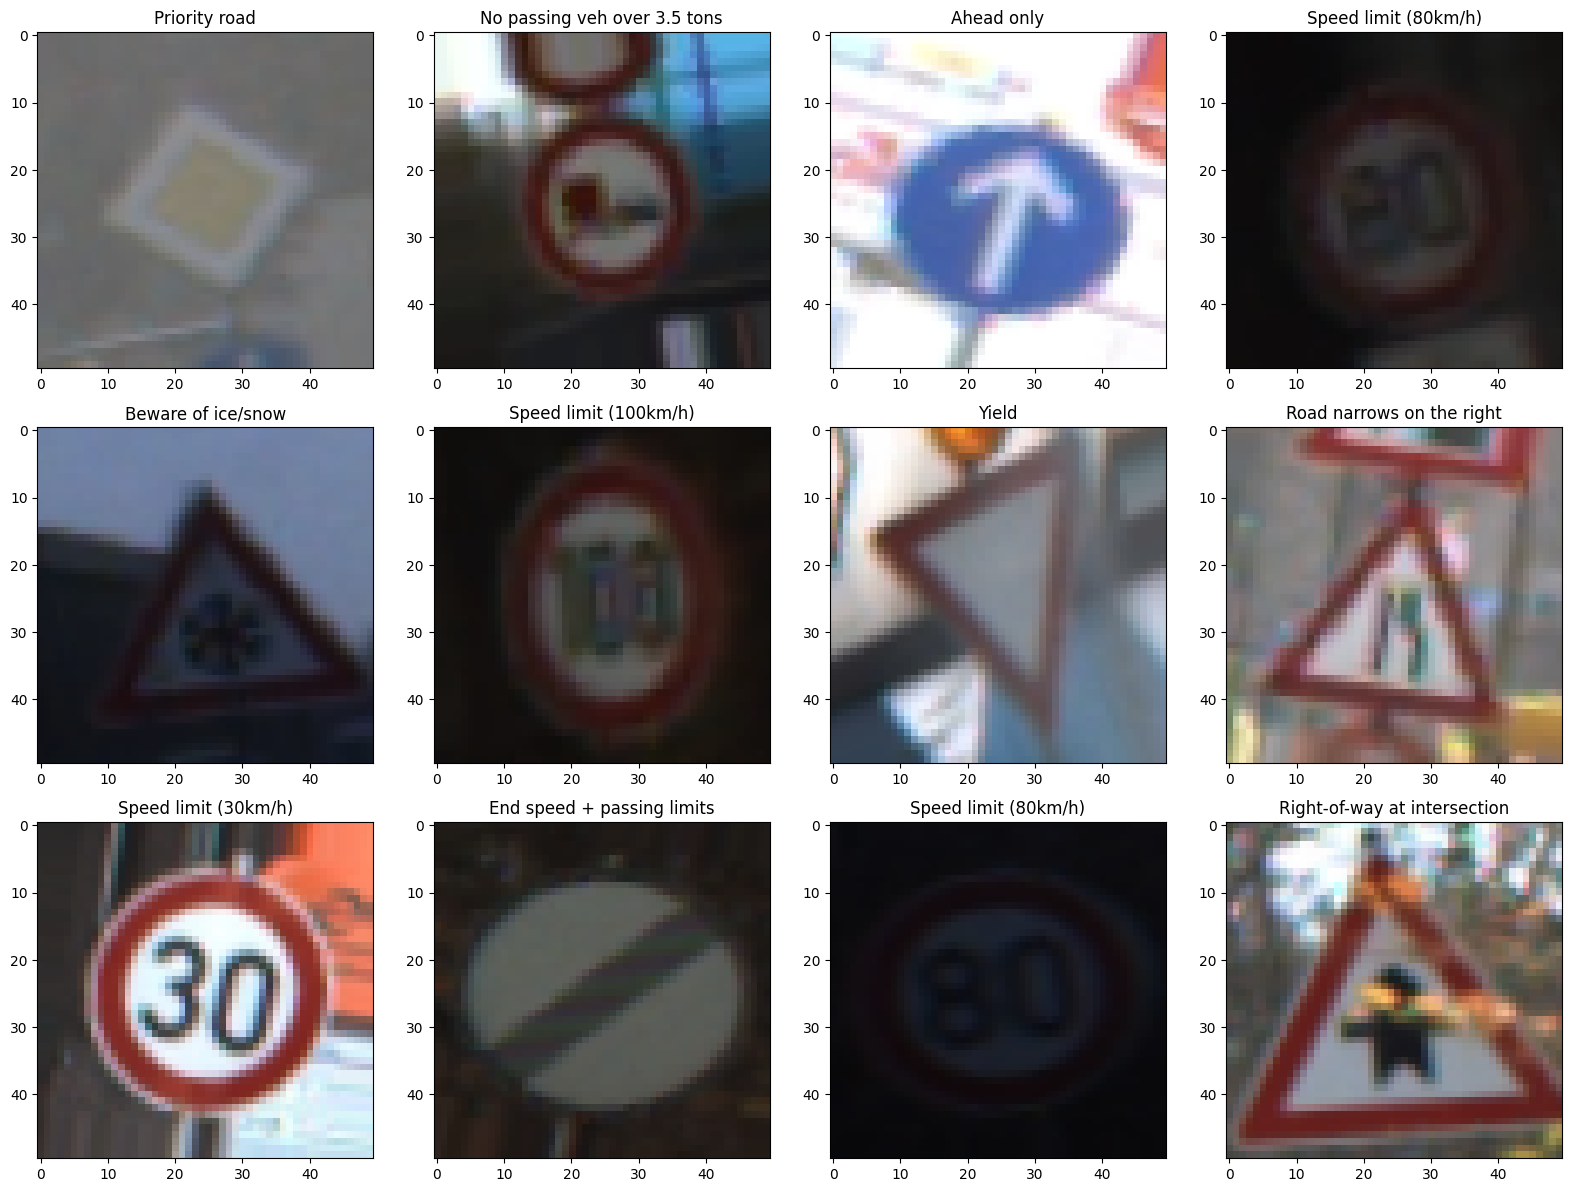

In [18]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_generator.next()
for i in range(3):
    for j in range (4):
        l=random.randint(0,batch_size-1)
        label = classes[int(list(train_generator.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5,5), activation='relu', input_shape=(50,50,3)),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.BatchNormalization(axis=-1),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(43, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        12832     
                                                                 
 max_pooling2d (MaxPooling2  (None, 21, 21, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 21, 21, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        3

In [21]:
lr = 0.01
epochs = 20

optimizer = tf.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', restore_best_weights=True, patience=5)

In [24]:
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator,
                    verbose=1,
                    callbacks=[earlyStopping])

Epoch 1/20
210/210 [==============================] - 68s 283ms/step - loss: 1.2968 - accuracy: 0.6640 - val_loss: 0.9136 - val_accuracy: 0.7375
Epoch 2/20
210/210 [==============================] - 54s 259ms/step - loss: 0.2356 - accuracy: 0.9269 - val_loss: 0.3238 - val_accuracy: 0.9160
Epoch 3/20
210/210 [==============================] - 52s 246ms/step - loss: 0.1362 - accuracy: 0.9589 - val_loss: 0.2284 - val_accuracy: 0.9374
Epoch 4/20
210/210 [==============================] - 54s 257ms/step - loss: 0.1127 - accuracy: 0.9655 - val_loss: 0.2916 - val_accuracy: 0.9250
Epoch 5/20
210/210 [==============================] - 52s 249ms/step - loss: 0.1094 - accuracy: 0.9673 - val_loss: 0.3490 - val_accuracy: 0.9255
Epoch 6/20
210/210 [==============================] - 52s 249ms/step - loss: 0.0849 - accuracy: 0.9739 - val_loss: 0.2460 - val_accuracy: 0.9457
Epoch 7/20
210/210 [==============================] - 52s 249ms/step - loss: 0.0753 - accuracy: 0.9771 - val_loss: 0.3191 - val_ac

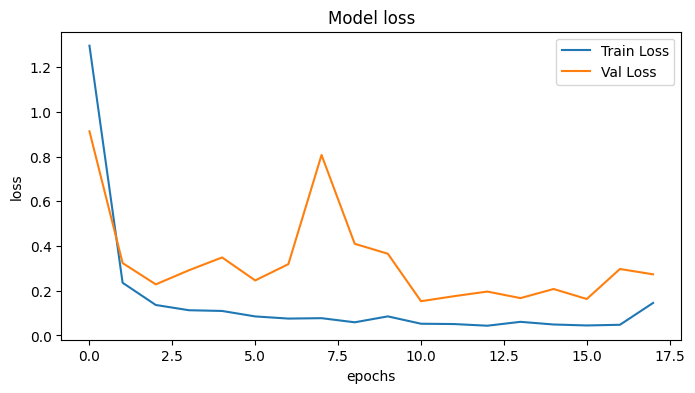

In [30]:
plt.figure(figsize = (8, 4))
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc = 'best')
plt.show()

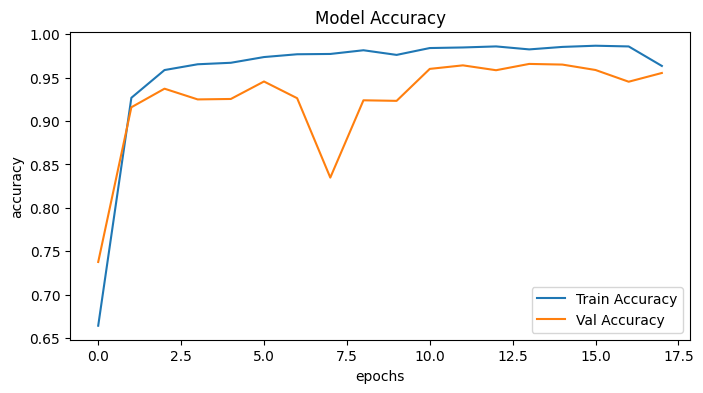

In [31]:
plt.figure(figsize = (8, 4))
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc = 'best')
plt.show()

In [32]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('sign.tflite')
tflite_model_file.write_bytes(tflite_model)

8763412

In [33]:
tflite_model_size = len(tflite_model) / (1024 * 1024)
print('TFLite model size = %d MBs.' % tflite_model_size)

TFLite model size = 8 MBs.
